In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-data-challenge/submission.csv
/kaggle/input/classification-data-challenge/train.csv
/kaggle/input/classification-data-challenge/test.csv


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import itertools

from sklearn.ensemble import RandomForestClassifier








In [5]:
df_train = pd.read_csv('/kaggle/input/classification-data-challenge/train.csv')
df_test = pd.read_csv('/kaggle/input/classification-data-challenge/test.csv')
df_submission = pd.read_csv('/kaggle/input/classification-data-challenge/submission.csv')

In [8]:
df_train.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print('Data description: \n\n')
print(f'Data shape is {df_train.shape}\n\n')
print(f'na value counts: {np.sum(df_train.isna().sum())}\n\n')
print(f'dtypes in the data is: {df_train.dtypes.unique()}')



Data description: 


Data shape is (4107, 87)


na value counts: 0


dtypes in the data is: [dtype('int64')]


In [20]:
X = df_train.drop(['Buy','Id'], axis = 1)
y = df_train['Buy']

0       0
1       0
2       0
3       0
4       0
       ..
4102    0
4103    0
4104    0
4105    1
4106    0
Name: Buy, Length: 4107, dtype: int64

In [75]:
from sklearn.feature_selection import mutual_info_classif

# Separate the features (X) and the target variable (y)

mi_scores = mutual_info_classif(X, y)

# Print the scores for each feature
for feature, score in zip(X.columns, mi_scores):
    print(f"Mutual Information Score for {feature}: {score}")

Mutual Information Score for V60: 0.005887243466415448
Mutual Information Score for V69: 0.013182589781131293
Mutual Information Score for V48: 0.011325511116344167
Mutual Information Score for V2: 0.009174900838093691
Mutual Information Score for V45: 0.0
Mutual Information Score for V44: 0.004159029710364859
Mutual Information Score for V81: 0.00019668399032979345
Mutual Information Score for V23: 0.0005370416977694692
Mutual Information Score for V18: 0.0007950547875754665
Mutual Information Score for V29: 0.0
Mutual Information Score for V19: 0.0028095859772454546
Mutual Information Score for V6: 0.006893653670768662
Mutual Information Score for V10: 0.004951159135282213
Mutual Information Score for V8: 0.003983924868614652
Mutual Information Score for V24: 0.00011067506292361529
Mutual Information Score for V40: 0.0008011100859499631
Mutual Information Score for V39: 0.001570806124333357
Mutual Information Score for V17: 0.0
Mutual Information Score for V15: 0.0031905529935152277


In [22]:
rf = RandomForestClassifier()
rf.fit(X,y)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature' : X.columns, 'Importance': importances})
feature

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

In [26]:
feature_importances.sort_values(by='Importance', ascending =False, inplace = True)

In [28]:
feature_importances[:30]

,Feature,Importance
58,V60,0.044443
67,V69,0.039862
46,V48,0.037943
0,V2,0.037119
43,V45,0.024701
42,V44,0.021557
79,V81,0.020940
21,V23,0.020897
16,V18,0.020470
27,V29,0.020173


In [34]:
cols = [col  for col in feature_importances[:30]['Feature']]

In [36]:
X = X[cols]

In [37]:
X.shape

(4107, 30)

# Studying mutual informations:

In [60]:
mi_scores = pd.DataFrame(index=X.columns, columns=X.columns)

for col1 in X.columns:
    for col2 in X.columns:
        if col1 == col2:
            mi_scores.loc[col1,col1] = -1
            continue
        mi_scores.loc[col1, col2] = mutual_info_score(X[col1], X[col2])


     
        # Print the pairwise mutual information scores
mi_scores.head()



,V60,V69,V48,V2,V45,V44,V81,V23,V18,V29,...,V66,V27,V25,V38,V33,V31,V28,V20,V32,V11
V60,-1,0.021289,0.027813,0.128688,0.213586,0.051159,0.702562,0.014245,0.012772,0.012767,...,0.211635,0.012209,0.014222,0.027855,0.014877,0.065414,0.011497,0.014528,0.065356,0.02956
V69,0.021289,-1,0.719744,0.020849,0.016812,0.006078,0.004365,0.005695,0.005975,0.008294,...,0.013179,0.003933,0.004507,0.005922,0.007201,0.008418,0.00626,0.005459,0.008475,0.005694
V48,0.027813,0.719744,-1,0.025752,0.015902,0.003857,0.006649,0.004761,0.006107,0.006963,...,0.013319,0.003701,0.00546,0.006373,0.006237,0.011606,0.005261,0.005989,0.01125,0.004518
V2,0.128688,0.020849,0.025752,-1,0.02568,1.840957,0.020893,0.221212,0.250432,0.302677,...,0.015396,0.169554,0.247973,0.25622,0.192134,0.385293,0.156918,0.268154,0.383529,0.305656
V45,0.213586,0.016812,0.015902,0.02568,-1,0.0084,0.192312,0.003113,0.004889,0.003704,...,0.682059,0.004174,0.003434,0.004159,0.004315,0.006575,0.002753,0.004827,0.006563,0.005101


In [64]:
pairs= list(itertools.combinations(X.columns, 2))

pair_scores = [(mi_scores.loc[col1,col2],(col1,col2)) for col1,col2 in pairs]

In [71]:
pair_scores.sort(reverse = True)

In [74]:
pair_scores[:30]

[(2.2154248617884327, ('V31', 'V32')),
 (2.0717227890574215, ('V2', 'V6')),
 (1.840956686101894, ('V2', 'V44')),
 (1.0246698227928956, ('V44', 'V6')),
 (0.8505366467188902, ('V18', 'V19')),
 (0.7197440435800793, ('V69', 'V48')),
 (0.7025624391030159, ('V60', 'V81')),
 (0.6820590537469177, ('V45', 'V66')),
 (0.5948687641750736, ('V10', 'V8')),
 (0.5409550541298291, ('V15', 'V16')),
 (0.440182958508372, ('V29', 'V19')),
 (0.4099021230932299, ('V2', 'V19')),
 (0.38529336321305946, ('V2', 'V31')),
 (0.3835285576545304, ('V2', 'V32')),
 (0.3527220589779145, ('V19', 'V17')),
 (0.34411103211086524, ('V29', 'V24')),
 (0.31988400751083634, ('V2', 'V17')),
 (0.31708983578211986, ('V17', 'V20')),
 (0.3131868586230966, ('V40', 'V38')),
 (0.307349496368022, ('V2', 'V16')),
 (0.3056563928688111, ('V2', 'V11')),
 (0.3026767582973719, ('V2', 'V29')),
 (0.2788232331692849, ('V2', 'V40')),
 (0.27394009834137856, ('V23', 'V27')),
 (0.2722648842696918, ('V19', 'V20')),
 (0.2702687553270053, ('V39', 'V38')

In [89]:
cols_to_drop = ['V2', 'V6', 'V19','V11','V20', 'V28','V31','V29','V15','V60','V69','V38']

In [91]:
X = X.drop(cols_to_drop, axis = 1)

In [92]:
X.shape

(4107, 18)

In [ ]:
mi_scores = pd.DataFrame(index=data.columns, columns=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        mi_scores.loc[col1, col2] = mutual_info_score(data[col1], data[col2])

# Print the pairwise mutual information scores
print(mi_scores)


Text(0.5, 1.0, 'Buy- pie')

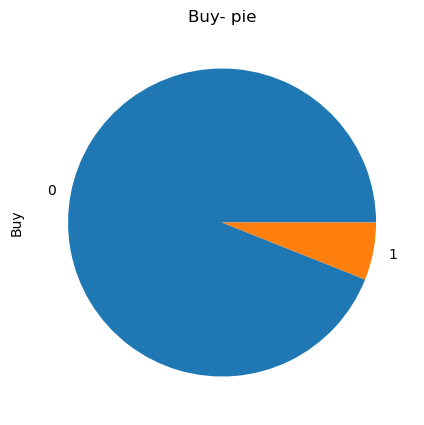

In [94]:
fig = plt.figure(figsize= (5,5))
y.value_counts().plot(kind='pie')
plt.title('Buy- pie')

In [98]:
neg, pos = np.bincount(y)
total = neg + pos
weight_for_0 = (1/neg)*(total/2.0)
weight_for_1 = (1/pos)*(total/2.0)
class_weights = {0:weight_for_0, 1:weight_for_1}

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [10, 20 ],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 150]
    # Add other parameters you want to tune
}

lgb_model = lgb.LGBMClassifier()


grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X, y, sample_weight=[class_weights[i] for i in y])

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [156]:
cv_results = grid_search.cv_results_
accuracy_scores = cv_results ['mean_test_score']

In [157]:
accuracy_scores

array([0.78012838, 0.83808305, 0.8076466 , 0.85707685, 0.66641862,
       0.70513409, 0.6761572 , 0.71268259])

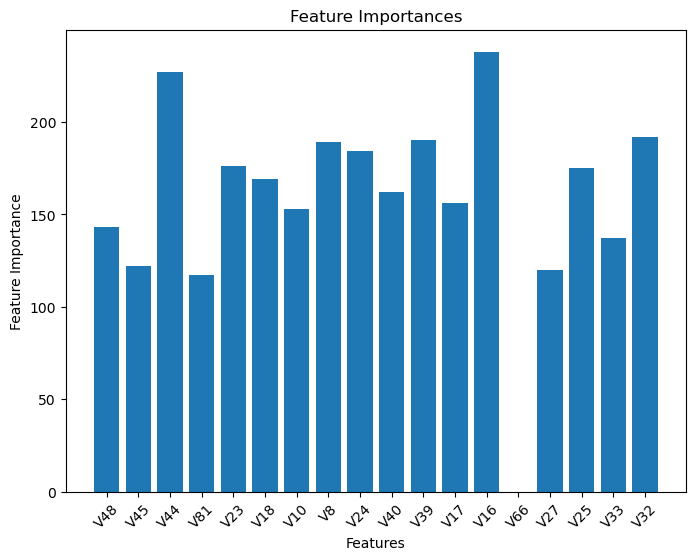

In [158]:
importances = best_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

In [159]:
X_test = df_test[X.columns]

In [160]:
X_test.shape

(1715, 18)

In [161]:
y_pred = best_model.predict_proba(X_test)

In [162]:
y_pred[:,1]

array([0.00504132, 0.12480829, 0.02226135, ..., 0.04797946, 0.1312923 ,
       0.129281  ])

In [163]:
df_submission['Predicted']=y_pred[:,1]

In [165]:
df_submission.to_csv('sub.csv', index = False)